# Assignment 1 - Creating and Manipulating Graphs

This assignment involved exploring employee social networks, including their favorite movies and coworker relationships. I learned basic NetworkX skills, including visualizing text files as social network graphs and retrieving specific nodes and edges and. I was given the following background information before answering a series of questions about the networks:

<br>
Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file 'Employee_Movie_Choices.txt'.

A second file, 'Employee_Relationships.txt', has data on the relationships between different coworkers.

The relationship score has value of '-100' (Enemies) to '+100' (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

In [99]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])

def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

In [100]:
choices = pd.read_table("Employee_Movie_Choices.txt", names=['Employee', 'Movie'], skiprows=1)

### Question 1 - Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

<IPython.core.display.Javascript object>


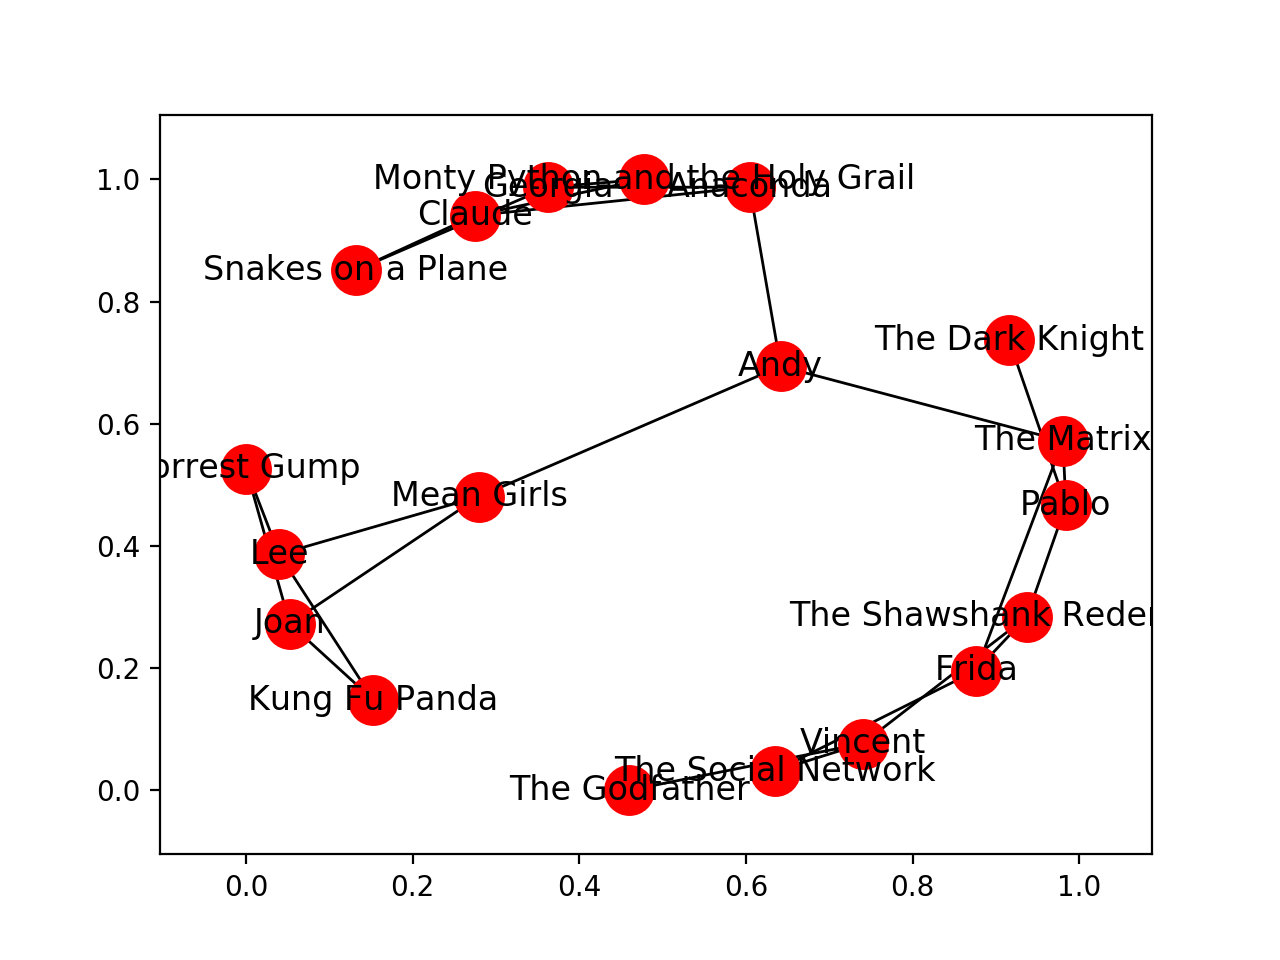

In [101]:
def answer_one():
    
    # Bipartite graph
    B = nx.from_pandas_dataframe(choices, "Employee", "Movie")
    """
    # Alternative code, done manually: 
    B = nx.Graph()
    B.add_nodes_from(choices['Employee'], bipartite=0)
    B.add_nodes_from(choices['Movie'], bipartite=1)
    for index, row in choices.iterrows():
        B.add_edge(row['Employee'], row['Movie'])
    """    
    return B

plot_graph(answer_one());

### Question 2 - Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

<IPython.core.display.Javascript object>


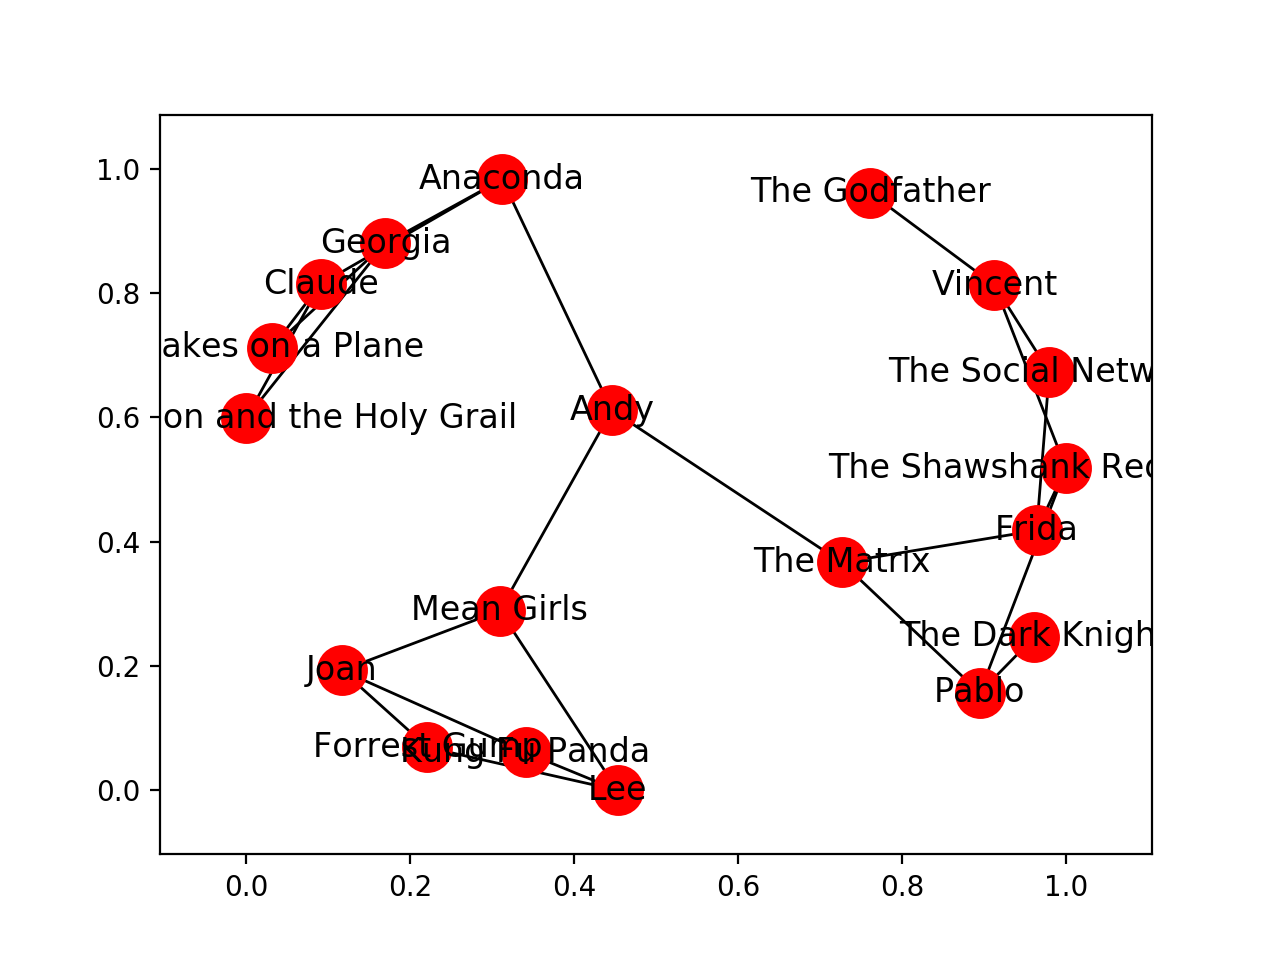

In [102]:
def answer_two():
    
    B = answer_one()
    nx.set_node_attributes(B, name='type', values = ['movie', 'employee'])
    
    return B

plot_graph(answer_two());

### Question 3 - Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

<IPython.core.display.Javascript object>


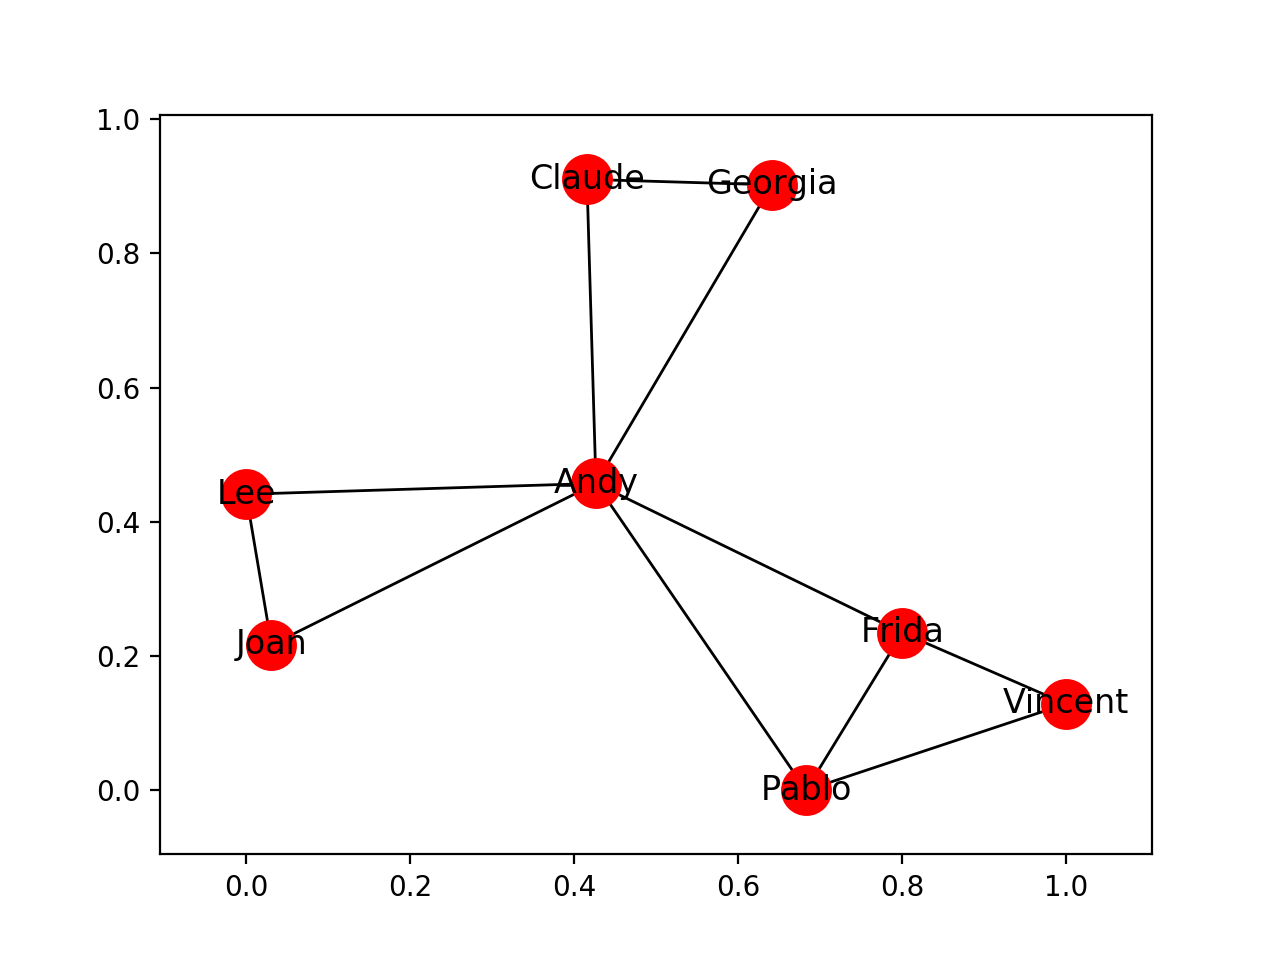

In [103]:
def answer_three():
    
    # Bipartite graph
    B = answer_two()
    W = bipartite.weighted_projected_graph(B, employees)
    
    return W

plot_graph(answer_three());

### Question 4

**Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.**

### Find the Pearson correlation between employee relationship scores and the number of movies they have in common. 

** Note: If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.**

In [62]:
def answer_four():
    
    # For Employees A and B, find...
    # A) Common Movies
    B = pd.DataFrame(answer_three().edges(data=True), columns=['A', 'B', 'Common_Movies'])
    ## Change 'weight' attribute into a column value
    B['Common_Movies'] = B['Common_Movies'].map(lambda x: x['weight'])
    
    ## Duplicate bivariate B dataframe. Rename columns so they can be attached to the original B dataframe
    D = B.copy().rename(columns={'A':'B', 'B':'A'})
    B = pd.concat([B, D], ignore_index=True)
    
    # B) Employee Relationship Score
    relation = pd.read_table("Employee_Relationships.txt", header=None, names=['A', 'B', 'Relationship'])
    
    # C) Find correlation, between employee relationship scores and number of movies in common
    x = B.merge(relation, how='right').fillna(0)
    
    return x['Common_Movies'].corr(x['Relationship'])

answer_four()

0.78839622217334726

---

# Assignment 2 - Network Connectivity

In this assignment, I analyzed an internal email communication network between employees of a mid-sized manufacturing company. 

In the social network, each node represents an employee. The left node represents the sender and the right node represents the recipient. Each directed edge between two nodes represents an individual email.

In [63]:
% matplotlib notebook
import matplotlib.pyplot as plt
import networkx as nx

!head email_network.txt

#Sender	Recipient	time
1	2	1262454010
1	3	1262454010
1	4	1262454010
1	5	1262454010
1	6	1262454010
1	7	1262454010
1	8	1262454010
1	9	1262454010
1	10	1262454010


In [64]:
# This graph function was initially provided in the last assignment. Use for visualization (not for Coursera's autograder)
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1 - Using networkx, load up the directed multigraph from `email_network.txt`. 

<IPython.core.display.Javascript object>


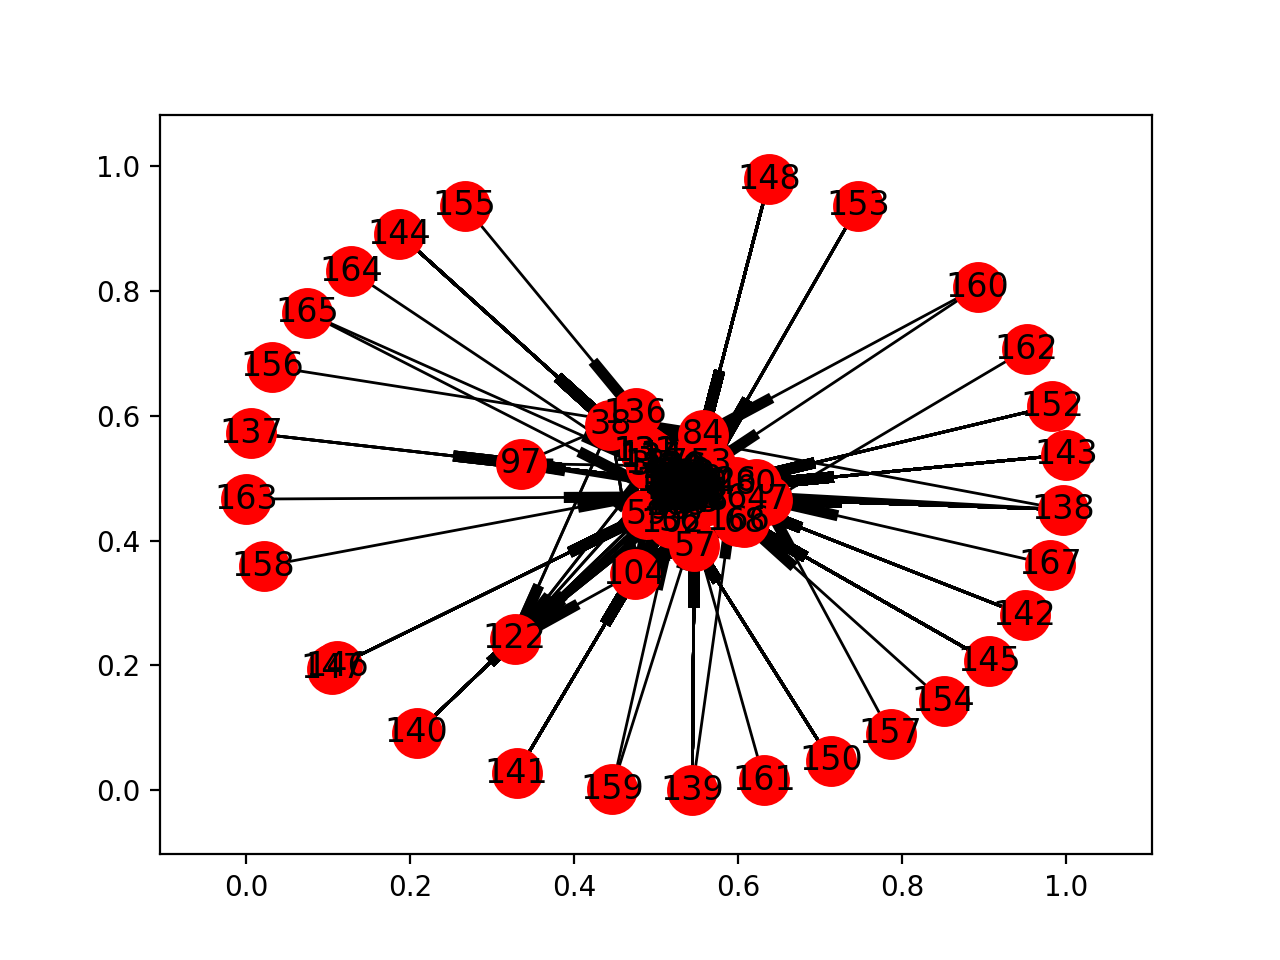

In [97]:
def answer_one():
    
    # Email network directed multigraph:
    G = nx.read_edgelist('email_network.txt', create_using=nx.MultiDiGraph(), data=(('weight', float),))
    
    return G

plot_graph(answer_one());

### Question 2 - How many employees and emails are represented in the graph from Question 1?

In [66]:
def answer_two():
        
    G = answer_one()
    # Note: Employees represent nodes, while emails represent edges on the graph
    return (G.number_of_nodes(), G.number_of_edges())

answer_two()

(167, 82927)

### Question 3

* **Part 1**: Assume that information in this company can only be exchanged through email.

    When an employee sends an email to another employee, a communication channel has been created, allowing the sender to provide information to the receiver, but not vice versa. 

    Based on the emails sent in the data, **is it possible for information to go from every employee to every other employee?**
    

* **Part 2**: Now assume that a communication channel established by an email allows information to be exchanged both ways. 

    Based on the emails sent in the data, **is it possible for information to go from every employee to every other employee?**

In [67]:
def answer_three():
        
    G = answer_one()

    ## Strongly connected channel = email sent only one way 
    strong = nx.is_strongly_connected(G)
    
    ## Weakly connected channel = sent both ways
    weak = nx.is_weakly_connected(G)
    
    return (strong, weak)


answer_three()

(False, True)

### Question 4 - How many nodes are in the largest (in terms of nodes) weakly connected component?

In [68]:
def answer_four():
        
    G = answer_one()
    
    # Find number of nodes that are in the largest weakly connected components
    nodes = len(max(nx.weakly_connected_components(G), key=len))
    return nodes

answer_four()

167

### Question 5 - How many nodes are in the largest (in terms of nodes) strongly connected component?

In [69]:
def answer_five():
    
    G = answer_one()
    
    # Find number of nodes that are in the largest strongest connected components
    nodes = len(max(nx.strongly_connected_components(G), key=len))
    
    return nodes

answer_five()

126

### Question 6 - Find the subgraph of nodes in a largest strongly connected component. 

Call this graph **G_sc.**

<IPython.core.display.Javascript object>


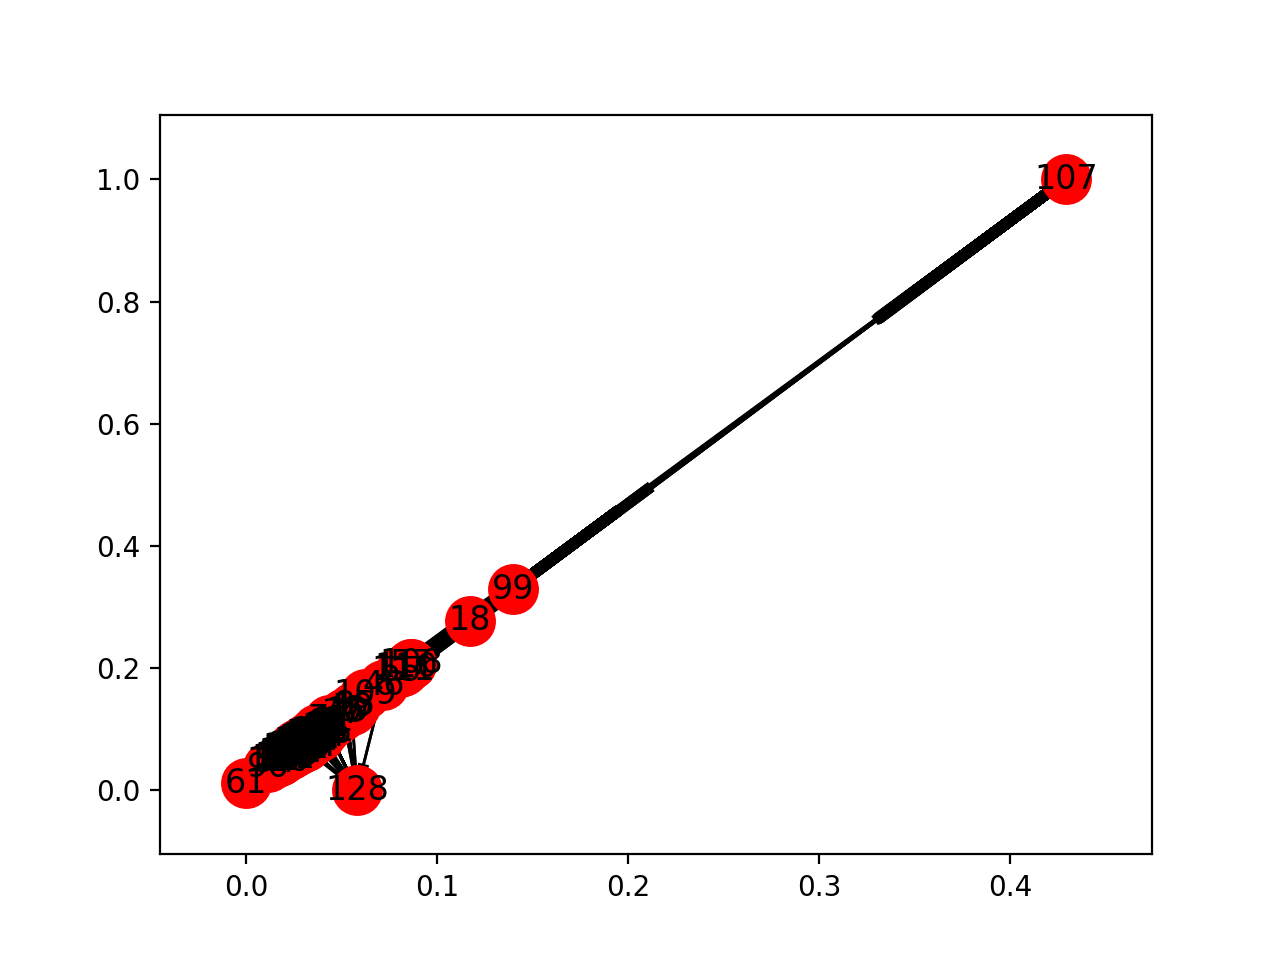

In [96]:
def answer_six():
        
    G = answer_one()
    
    # Subgraph with largest connected components:
    G_sc = max(nx.strongly_connected_component_subgraphs(G), key=len)
    
    return G_sc

plot_graph(answer_six());

### Question 7 - What is the average distance between nodes in G_sc?

In [71]:
def answer_seven():
    
    G_sc = answer_six()
    
    # Average shortest distance between nodes:
    return nx.average_shortest_path_length(G_sc)

answer_seven()

1.6461587301587302

### Question 8 - What is the largest possible distance between two employees in G_sc?

In [72]:
def answer_eight():
    
    G_sc = answer_six()
    
    # Diameter - Largest possible distance between employees:
    return nx.diameter(G_sc)

answer_eight()

3

### Question 9

What is the set of nodes in G_sc with eccentricity equal to the diameter?

*This function should return a set of the node(s).*

In [73]:
def answer_nine():
    
    G_sc = answer_six()
    
    # Periphery - Set of nodes with eccentricity equal to the diameter:
    return set(nx.periphery(G_sc))

answer_nine()

{'129', '134', '97'}

### Question 10 - What is the set of node(s) in G_sc with eccentricity equal to the radius?

In [74]:
def answer_ten():
        
    G_sc = answer_six()
    
    # Center - Set of nodes with eccentricity equal to the radius:
    return set(nx.center(G_sc))

answer_ten()

{'38'}

### Question 11 - Which node in G_sc is connected to the most other nodes by a shortest path of length equal to the diameter of G_sc?  How many nodes are connected to this node?

In [75]:
def answer_eleven():
    
    ## Graph and its diameter
    G_sc = answer_six()
    d = answer_eight()
    
    ## Periphery: Nodes with eccentricity == diameter
    nodes = nx.periphery(G_sc)
    
    ## Node with most connections
    most_n = 0
    most_val = 0
    
    # Find all shortest length paths for periphery nodes
    for n in nodes:
        path = nx.shortest_path_length(G_sc, n)
        # Number of node connections with path length equal to the diameter
        connections = list(path.values()).count(d)
        
        if connections > most_val:
            # Node with most node connections:
            most_n = n
            most_val = connections
            
    return (most_n, most_val)

answer_eleven()

('97', 63)

### Question 12 

**Suppose you want to prevent communication from flowing to the node that you found in the previous question from any node in the center of G_sc.** 

### What is the smallest number of nodes you would need to remove from the graph? 

In [76]:
def answer_twelve():
    
    G_sc = answer_six()
    
    # Node name, center
    node = answer_eleven()[0]
    center = nx.center(G_sc)[0]
    
    # Minimum number of nodes to break connection between center and target
    return nx.node_connectivity(G_sc, s=center, t=node) - 1

answer_twelve()

5

### Question 13 - Construct an undirected graph G_un using G_sc.

<IPython.core.display.Javascript object>


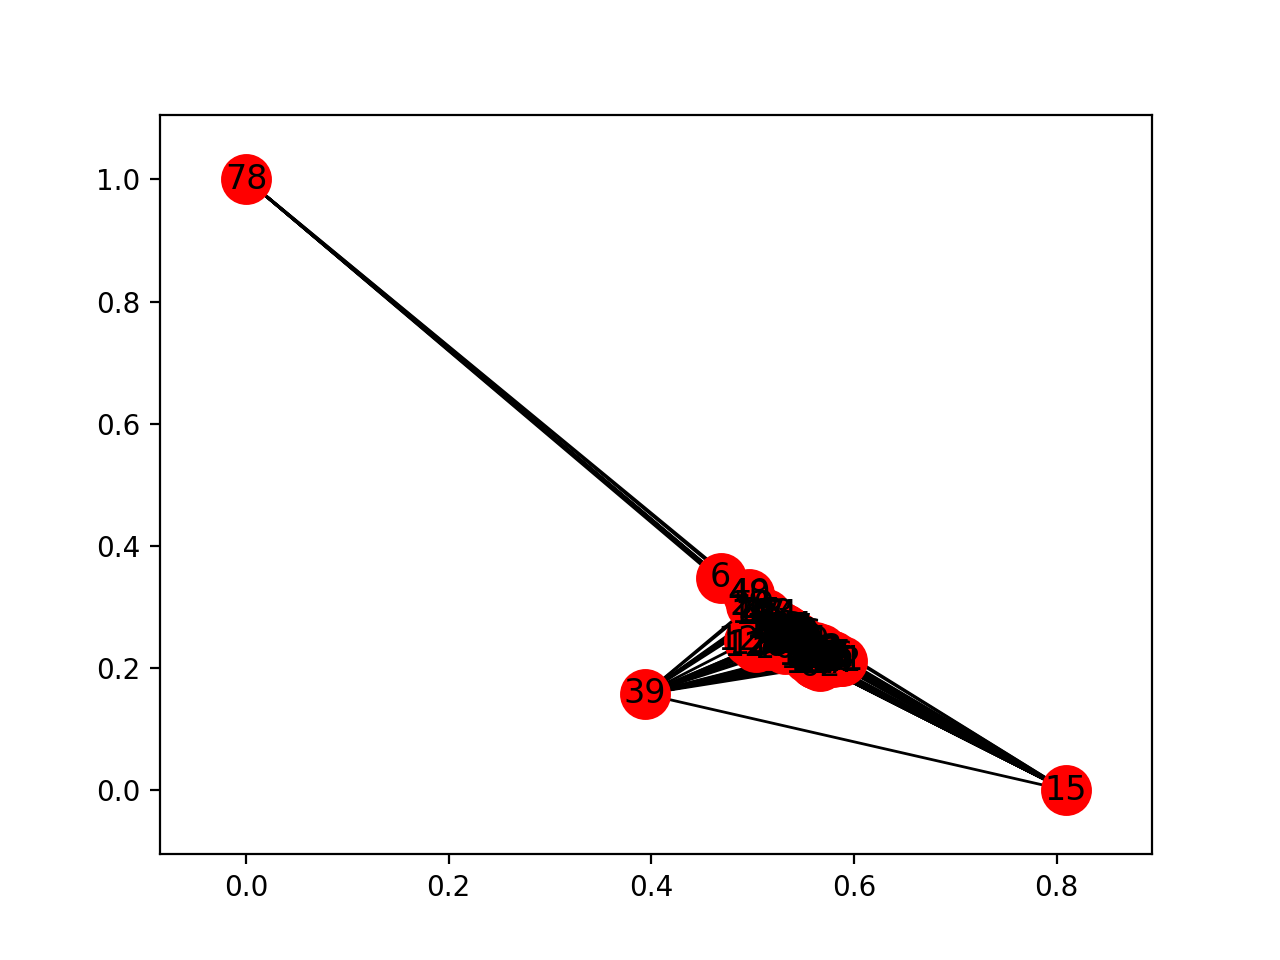

In [95]:
def answer_thirteen():
        
    G_sc = answer_six()
    G_un = G_sc.to_undirected()
    
    return nx.Graph(G_un)

plot_graph(answer_thirteen())

### Question 14 - What is the transitivity and average clustering coefficient of graph G_un?

In [78]:
def answer_fourteen():
        
    G_un = answer_thirteen()
    
    return (nx.transitivity(G_un), nx.average_clustering(G_un))

answer_fourteen()

(0.570111160700385, 0.6975272437231419)

---
# Assignment 3 - Network Centrality

In this assignment, I explored measures of centrality, such as degree, closeness, and betweeness. I also applied the HITS (Hyperlink Induced Topic Search) Algorithm to rank nodes belonging to a website. I analyzed the following social networks:

* Part 1 - Friendship network

* Part 2 - Political blog network

## Part 1

Answer questions 1-4 using the networkx graph `G1`, a network of friendships at a university department. Each node corresponds to a person, and an edge indicates friendship. 

In [79]:
import networkx as nx

G1 = nx.read_gml('friendships.gml')

<IPython.core.display.Javascript object>


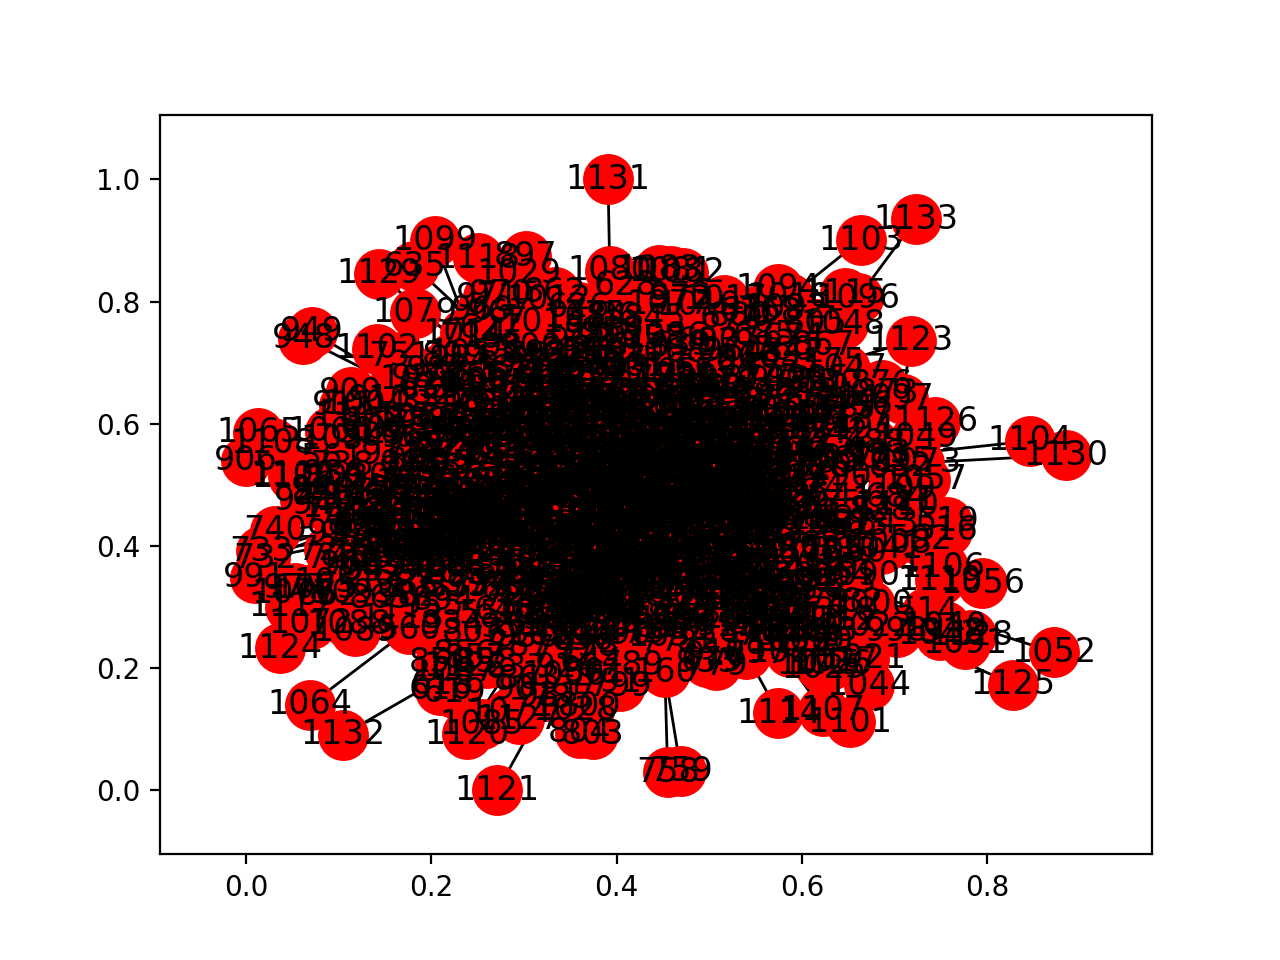

In [94]:
# Network plot (Not permitted by Coursera's autograder)

def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);
        
plot_graph(G1);

### Question 1 - Find the degree centrality, closeness centrality, and normalized betweeness centrality (excluding endpoints) of node 100.

In [81]:
def answer_one():
    
    # Centrality measures:
    
    ## Degree:
    deg = nx.degree_centrality(G1)
    
    ## Closeness:
    close = nx.closeness_centrality(G1)
    
    ## Betweenness
    between = nx.betweenness_centrality(G1)
    
    return (deg.get(100), close.get(100), between.get(100))

answer_one()

(0.0026501766784452294, 0.2654784240150094, 7.142902633244772e-05)

<br>
#### For Questions 2, 3, and 4, assume that you do not know anything about the structure of the network, except for the all the centrality values of the nodes. That is, use one of the covered centrality measures to rank the nodes and find the most appropriate candidate.
<br>

### Question 2

**Suppose you are employed by an online shopping website and are tasked with selecting one user in network G1 to send an online shopping voucher to. We expect that the user who receives the voucher will send it to their friends in the network.  You want the voucher to reach as many nodes as possible. The voucher can be forwarded to multiple users at the same time, but the travel distance of the voucher is limited to one step, which means if the voucher travels more than one step in this network, it is no longer valid.** 

## Apply a network centrality measure to select the best candidate for the voucher. 

In [82]:
def answer_two():
     
    # Degree centrality: Number of ties a node has
    deg = nx.degree_centrality(G1)
    
    return max(deg, key=deg.get)

answer_two()

105

### Question 3

**Now the limit of the voucher’s travel distance has been removed. Because the network is connected, regardless of who you pick, every node in the network will eventually receive the voucher. However, we now want to ensure that the voucher reaches the nodes in the lowest average number of hops.**

## How would you change your selection strategy? Determine who is the best candidate in the network under this condition.

### Question 4

**Assume the restriction on the voucher’s travel distance is still removed, but now a competitor has developed a strategy to remove a person from the network in order to disrupt the distribution of your company’s voucher. Your competitor is specifically targeting people who are often bridges of information flow between other pairs of people.** 

## Identify the single riskiest person to be removed under your competitor’s strategy?

In [83]:
def answer_four():
    
    # Betweenness: Measures of nodes that act like a bridge along the shortest path between nodes
    between = nx.betweenness_centrality(G1)
    
    return max(between, key=between.get)

answer_four()

333

## Part 2

`G2` is a directed network of political blogs, where nodes correspond to a blog and edges correspond to links between blogs. Use your knowledge of PageRank and HITS to answer Questions 5-9.

In [84]:
G2 = nx.read_gml('blogs.gml')

### Question 5 - Apply the Scaled Page Rank Algorithm to this network. Find the Page Rank of node 'realclearpolitics.com' with damping value 0.85.

In [85]:
def answer_five():

    # Page Rank:
    rank = nx.pagerank(G2, alpha=0.85)
    
    return rank.get("realclearpolitics.com")

answer_five()

0.004636694781649093

### Question 6 - Apply the Scaled Page Rank Algorithm to this network with damping value 0.85. Find the 5 nodes with highest Page Rank. 

In [86]:
def answer_six():
        
    # Page Rank:
    rank = nx.pagerank(G2, alpha=0.85)
    
    # Top 5 Page Rank:
    return sorted(rank, key=rank.get, reverse=True)[0:5]

answer_six()

['dailykos.com',
 'atrios.blogspot.com',
 'instapundit.com',
 'blogsforbush.com',
 'talkingpointsmemo.com']

### Question 7 - Apply the HITS Algorithm to the network to find the hub and authority scores of node 'realclearpolitics.com'. 

In [87]:
def answer_seven():
        
    # Hub and authority scores:
    ## For the entire network...
    hits = list(nx.hits(G2))

    ## For a given node...
    return (hits[0].get('realclearpolitics.com'), hits[1].get('realclearpolitics.com'))

answer_seven()

(0.000324355614091667, 0.003918957645699856)

### Question 8 - Apply the HITS Algorithm to this network to find the 5 nodes with highest hub scores.

In [88]:
def answer_eight():
    
    # From tuple, retrieve list of two dictionaries: hub and authority scores
    hits = list(nx.hits(G2))
    ## Dictionary of hub scores
    hub = hits[0]
    
    # Top 5 Hub Scores:
    return sorted(hub, key=hub.get, reverse=True)[0:5]

answer_eight()

['politicalstrategy.org',
 'madkane.com/notable.html',
 'liberaloasis.com',
 'stagefour.typepad.com/commonprejudice',
 'bodyandsoul.typepad.com']

### Question 9 - Apply the HITS Algorithm to this network to find the 5 nodes with highest authority scores.

In [89]:
def answer_nine():
    
    # From tuple, retrieve list of two dictionaries: hub and authority scores
    hits = list(nx.hits(G2))
    ## Dictionary of authority scores
    auth = hits[1]
    
    # Top 5 Authority Scores:
    return sorted(auth, key=auth.get, reverse=True)[0:5]

answer_nine()

['dailykos.com',
 'talkingpointsmemo.com',
 'atrios.blogspot.com',
 'washingtonmonthly.com',
 'talkleft.com']